In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [ ]:
data = pd.read_csv("iBeacon_RSSI_Labeled.csv", index_col=None)
data.head(5)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


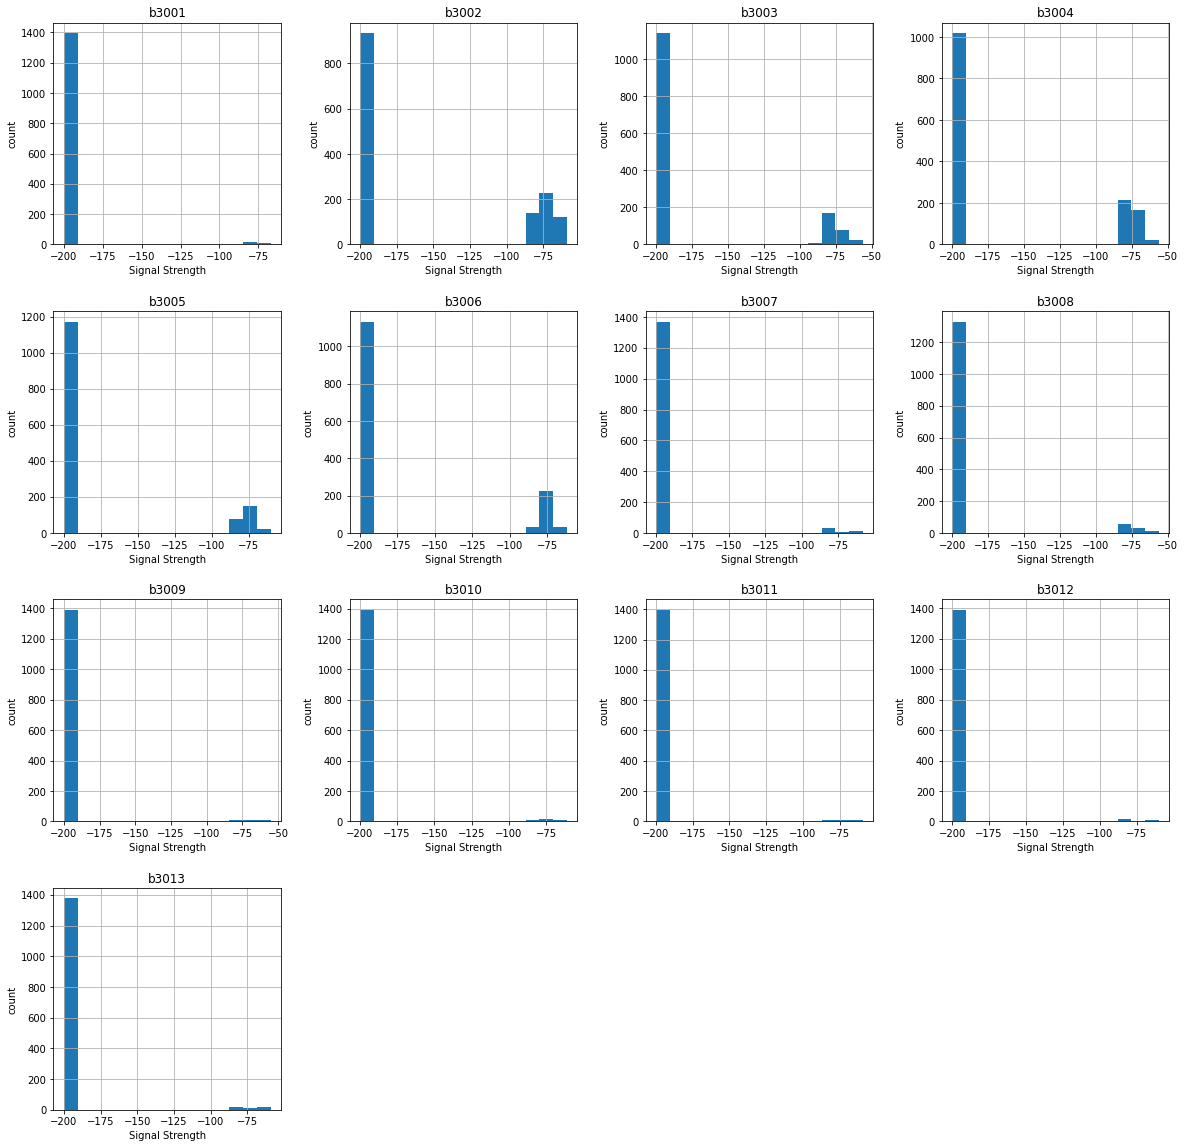

In [ ]:
plots = data.hist(bins=15, figsize=(20,20))

for ax in plots.flatten():
    ax.set_xlabel("Signal Strength")
    ax.set_ylabel("count")

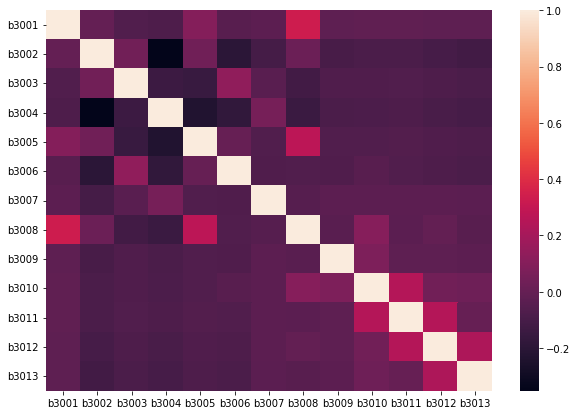

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(method='kendall'), ax=ax)

In [ ]:
#data.max()

In [ ]:
data.head(5)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [ ]:
label = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
for col in data.select_dtypes(include="number").columns:
    data[col] = pd.cut(data[col], bins = 15, labels = label)
    


# Label Encoding
from sklearn.preprocessing import LabelEncoder
data['x'] = LabelEncoder().fit_transform(data['x'])
data['y'] = LabelEncoder().fit_transform(data['y'])

# Dropping the columns
#data = data.drop(columns=["date","location"])
data.head()


KeyError: ignored

In [ ]:
data = pd.get_dummies(data, columns=data.columns[0:-2])
data.head(5)

In [ ]:
target_x = data['x']
target_y = data['y']
data.drop(columns=['x','y'], inplace=True)
data.head(5)

In [ ]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train_x, t_test_x = train_test_split(data, 
                                                    target_x, 
                                                    test_size = 0.3,
                                                    random_state=999)

D_train, D_test, t_train_y, t_test_y = train_test_split(data, 
                                                    target_y, 
                                                    test_size = 0.3,
                                                    random_state=999)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

k_fold_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=8)
################################## KNN #####################################################

parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15], 
              'p': [1, 2, 5]}

knn = KNeighborsClassifier()

gs_knn_x = GridSearchCV(estimator=knn, 
                      param_grid=parameters_knn, 
                      cv=k_fold_method,
                      verbose=1, 
                      n_jobs=-2,
                      scoring='accuracy',
                      return_train_score=True)

gs_knn_y = GridSearchCV(estimator=knn, 
                      param_grid=parameters_knn, 
                      cv=k_fold_method,
                      verbose=1, 
                      n_jobs=-2,
                      scoring='accuracy',
                      return_train_score=True)

################################### DT ########################################################

parameters_dt = {'criterion':['gini','entropy'],'max_depth':[2,3,4]}

dt = DecisionTreeClassifier()

gs_dt_y = GridSearchCV(estimator=dt,
                    param_grid=parameters_dt,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

gs_dt_x = GridSearchCV(estimator=dt,
                    param_grid=parameters_dt,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

####################################### SVC ####################################################

parameters_svc = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

svc = SVC()

gs_svc_x = GridSearchCV(estimator=svc,
                    param_grid=parameters_svc,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

gs_svc_y = GridSearchCV(estimator=svc,
                    param_grid=parameters_svc,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

In [ ]:
gs_dt_y.fit(D_train, t_train_y)
gs_dt_x.fit(D_train, t_train_x)

gs_knn_y.fit(D_train, t_train_y)
gs_knn_x.fit(D_train, t_train_x)

gs_svc_y.fit(D_train, t_train_y)
gs_svc_x.fit(D_train, t_train_x)

In [ ]:
#function to return an array with distances between the actual and predicted points
def distance(x_actual, y_actual, x_predicted, y_predicted):
    d_x = x_actual - x_predicted
    d_y = y_actual - y_predicted
    dist = d_x**2 + d_y**2
    dist = np.sqrt(dist)
    #dist = np.sort(dist)
    return dist

In [ ]:
models_predictions_x = {'KNN_x': gs_knn_x.predict(D_test), 'DT_x': gs_dt_x.predict(D_test), 'SVC_x': gs_svc_x.predict(D_test)}

models_predictions_y = {'KNN_y': gs_knn_y.predict(D_test), 'DT_y': gs_dt_y.predict(D_test), 'SVC_y': gs_svc_y.predict(D_test)}

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs

for ax, px in zip(axs,models_predictions_x):
    for axes, py in zip(ax,models_predictions_y):
        distances = distance(t_test_x, t_test_y, models_predictions_x[px], models_predictions_y[py])
        sorted_distances = np.sort(distances)
        probabilites = 1. * np.arange(len(sorted_distances))/(len(sorted_distances) - 1)
        axes.plot(sorted_distances, probabilites)
        axes.set_title(f'CDF: Euclidean dist. error: {px}|{py}')
        axes.set(xlabel = 'Distance (m)', ylabel = 'Probability')
        axes.text(2,0.05,f"Mean Error dist.: {np.mean(distances)}")
        axes.grid(True)
        gridlines = axes.get_xgridlines() + axes.get_ygridlines()
        for line in gridlines:
            line.set_linestyle(':')


fig.tight_layout()
plt.show()
plt.close()

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np
from PIL import Image

image = Image.open("iBeacon_Layout.jpg")
init_notebook_mode(connected=True)

xm=np.min(t_test_x)-1.5
xM=np.max(t_test_x)+1.5
ym=np.min(t_test_y)-1.5
yM=np.max(t_test_y)+1.5

data=[dict(x=[0], y=[0], 
           mode="markers", name = "Predictions",
           line=dict(width=2, color='green')
          ),
      dict(x=[0], y=[0], 
           mode="markers", name = "Actual",
           line=dict(width=2, color='blue')
          )
      
    ]

layout=dict(xaxis=dict(range=[xm, 24], autorange=False, zeroline=False),
            yaxis=dict(range=[ym, 21], autorange=False, zeroline=False),
            title='Predictions for SVC', hovermode='closest',
            images= [dict(
                  source= image,
                  xref= "x",
                  yref= "y",
                  x= -3.5,
                  y= 22,
                  sizex= 36,
                  sizey=25,
                  sizing= "stretch",
                  opacity= 0.5,
                  layer= "below")]
            )

frames=[dict(data=[dict(x=[models_predictions_x['SVC_x'][k]], 
                        y=[models_predictions_y['SVC_y'][k]], 
                        mode='markers',
                        
                        marker=dict(color='red', size=10)
                        ),
                   dict(x=[t_test_x.iloc[k]], 
                        y=[t_test_y.iloc[k]], 
                        mode='markers',
                        
                        marker=dict(color='blue', size=10)
                        )
                  ]) for k in range(int(len(t_test_x))) 
       ]    
          
figure1=dict(data=data, layout=layout, frames=frames)          
iplot(figure1)